In [10]:
from qutip import *
from matplotlib import pyplot as plt

In [11]:
def get_state(n):
    d_up = tensor(basis(2,1), basis(2,0))
    d_dn = tensor(basis(2,0), basis(2,1))
    k_up = 0
    k_dn = 0
    for k in range(n):
        base = [basis(2,0)]*2*n
        base[2*k] = basis(2,1)
        k_up += tensor(base)
    for k in range(n):
        base = [basis(2,0)]*2*n
        base[2*k+1] = basis(2,1)
        k_dn += tensor(base)
    return (tensor(d_up, k_dn) - tensor(d_dn, k_up)).unit()

In [23]:
def mutI(psi):
    rho = psi * psi.dag()
    rho_12 = rho.ptrace([2,4])
    rho_1 = rho_12.ptrace(0)
    rho_2 = rho_12.ptrace(1)
    return  entropy_vn(rho_1) + entropy_vn(rho_2) - entropy_vn(rho_12), entropy_vn(rho_1)

2
3
4
5
6


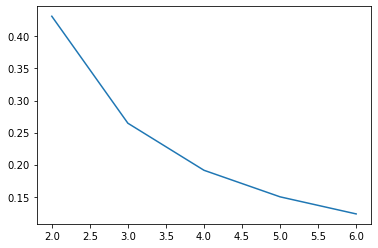

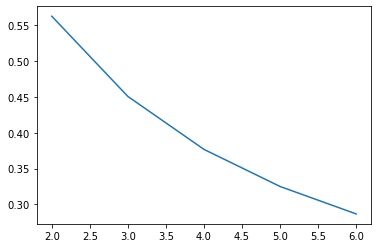

In [24]:
I1 = []
I2 = []
for n in range(2,7):
    print (n)
    I = mutI(get_state(n))
    I1.append(I[0])
    I2.append(I[1])
plt.plot(range(2,7), I1)
plt.show()
plt.plot(range(2,7), I2)
plt.show()